# About Dataset

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

# Module 1: EDA Foundations

* Understanding data types and structures
* Statistical measures (central tendency, dispersion, correlation)
* Data quality assessment techniques

In [2]:
# Env setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# set visualization style
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)
sns.set_palette('Set2')

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

# initial data exploration
print(f'Dataset shape: {df.shape}')

# understading data types
print(f"\nData types:\n{df.dtypes}")
# checking for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")
# checking for duplicates
print(f"\nDuplicates:\n{df.duplicated().sum()}")
# checking for outliers
print(f"\nOutliers:\n{df.describe()}")
# checking for class imbalance
print(f"\nClass imbalance:\n{df['Churn'].value_counts()}")

df.head()

Dataset shape: (7043, 21)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# identify categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"categorical features: {categorical_cols}")
print(f"numerical features: {numerical_cols}")

# check unique values in categorical features
for col in categorical_cols:
    print(f"\n unique values in {col}: {df[col].unique()}")


categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

 unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 unique values in gender: ['Female' 'Male']

 unique values in Partner: ['Yes' 'No']

 unique values in Dependents: ['No' 'Yes']

 unique values in PhoneService: ['No' 'Yes']

 unique values in MultipleLines: ['No phone service' 'No' 'Yes']

 unique values in InternetService: ['DSL' 'Fiber optic' 'No']

 unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']

 unique values in OnlineBackup: ['Yes' 'No' 'No internet service']

 unique values in DeviceProtection: ['No' 'Yes' 'No internet service']

 

# 📚 Quick Notes on Correlation (r)

- Correlation (r) measures the strength and direction of a linear relationship.
- Values of r range from -1 to +1.
    - r = +1 → Perfect positive linear relationship
    - r = -1 → Perfect negative linear relationship
    - r =  0 → No linear relationship
- Pearson correlation assumes:
    - Linearity
    - Normality
    - Homoscedasticity (constant variance)

##  📈 Pearson Correlation Coefficient Formula
r = Cov(X, Y) / (σ_X * σ_Y)

where:
- Cov(X, Y) = Covariance between X and Y
- σ_X = Standard deviation of X
- σ_Y = Standard deviation of Y

## 📈 Covariance Formula
Cov(X, Y) = (1 / (n-1)) * Σ[(xᵢ - x̄)(yᵢ - ȳ)]

where:
- x̄ = Mean of X
- ȳ = Mean of Y
- n = Number of samples

In [6]:
# basic statistical analysis
churn_counts = df['Churn'].value_counts()
print(f"Churn counts:\n{churn_counts}")
print(f"Churn rate: {churn_counts[1] / churn_counts.sum() * 100:.2f}%")

# correlation b/w numerical variables
if len(numerical_cos) > 1:
    correlation = df[numerical_cos].corr()
    print(f"Correlation between numerical variables:\n{correlation}")

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn rate: 26.54%
Correlation between numerical variables:
                SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.016567        0.220173
tenure               0.016567  1.000000        0.247900
MonthlyCharges       0.220173  0.247900        1.000000


# Module 2: Data Visualization Fundamentals

* Choosing appropriate visualization types
* Building univariate analysis visualizations
* Creating effective bivariate and multivariate visualizations

## Univariate Analysis

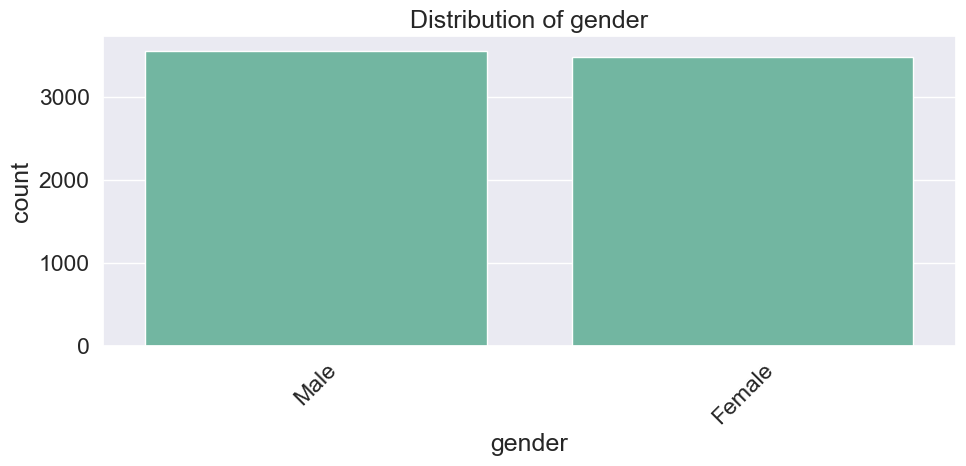

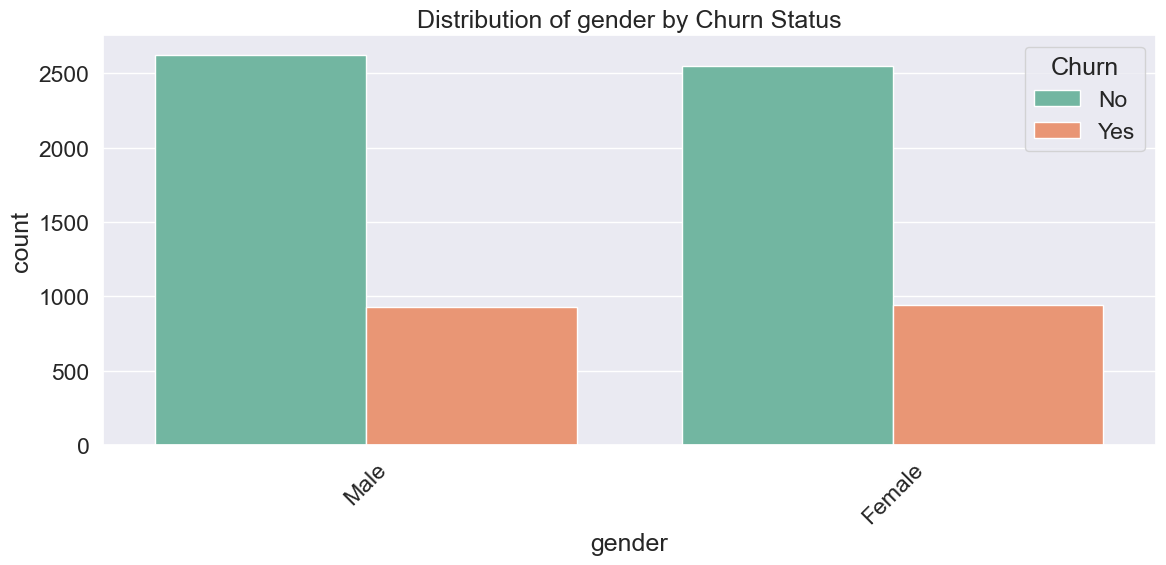

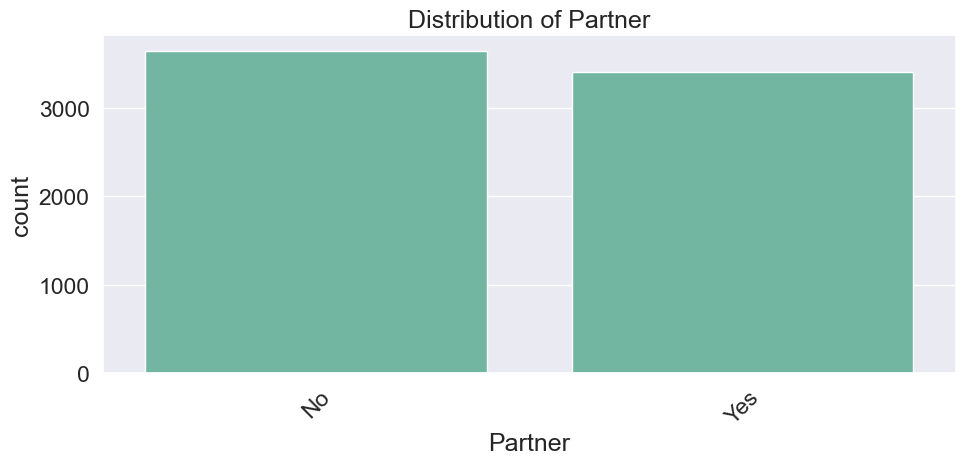

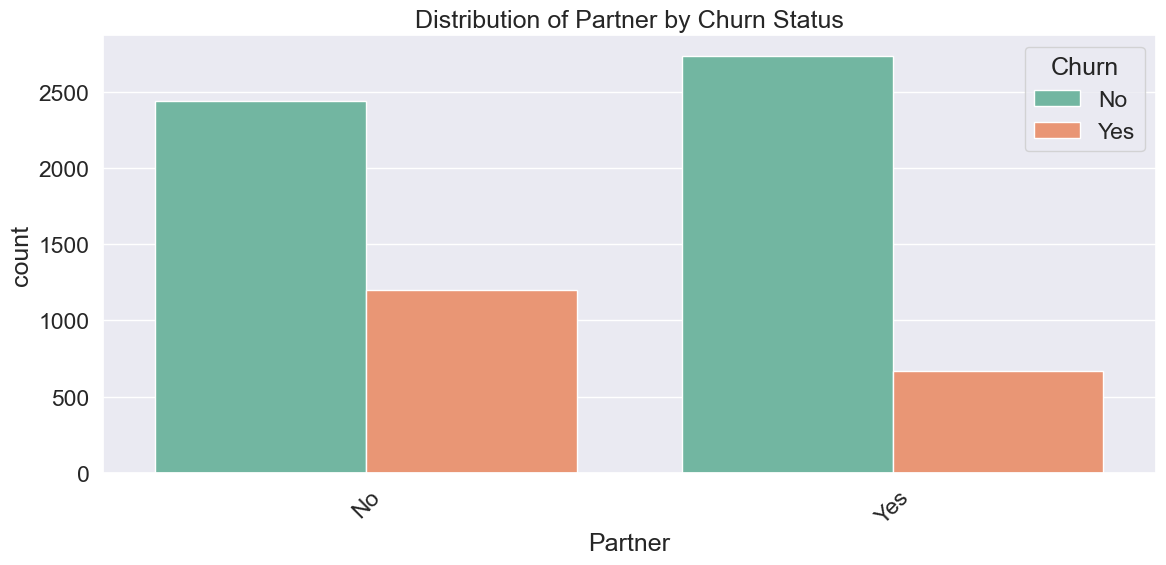

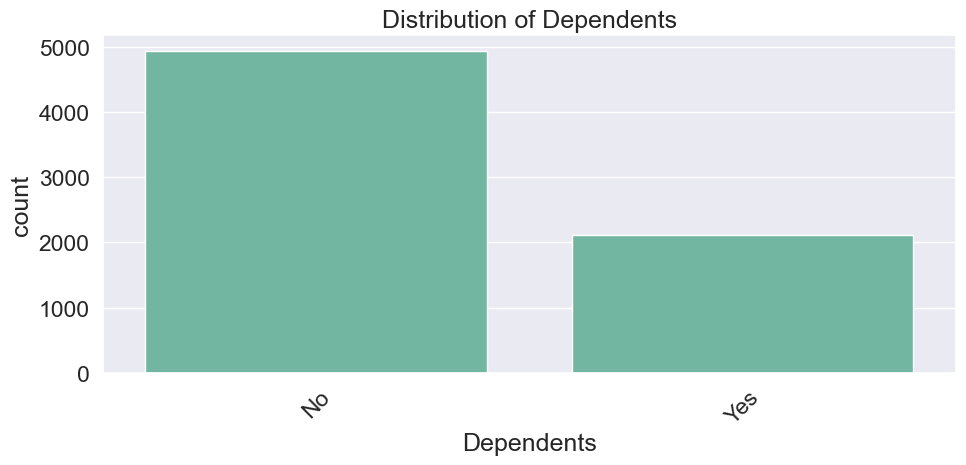

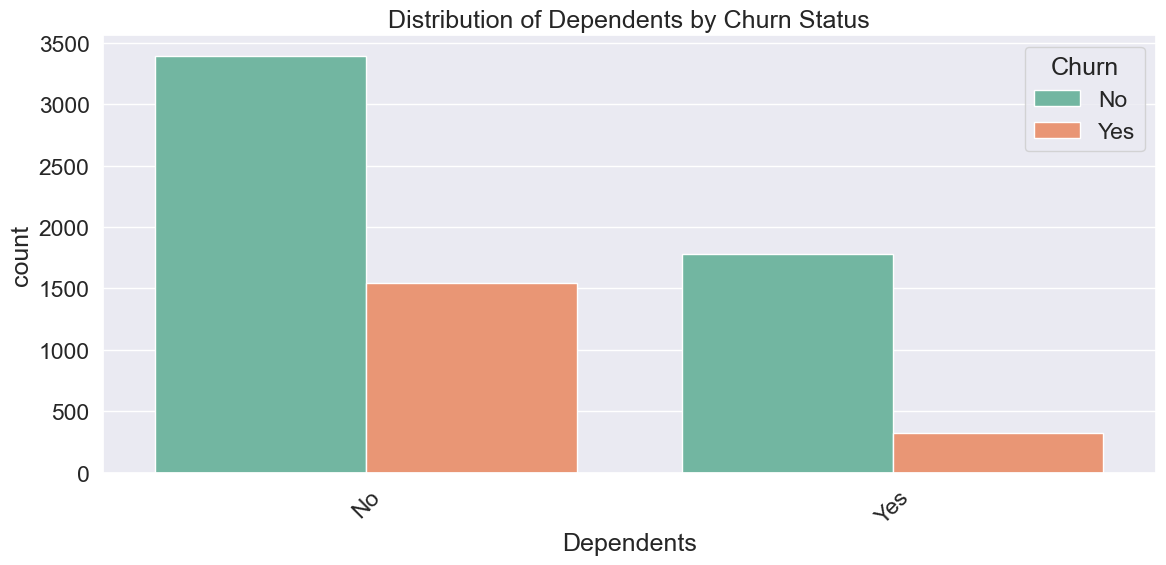

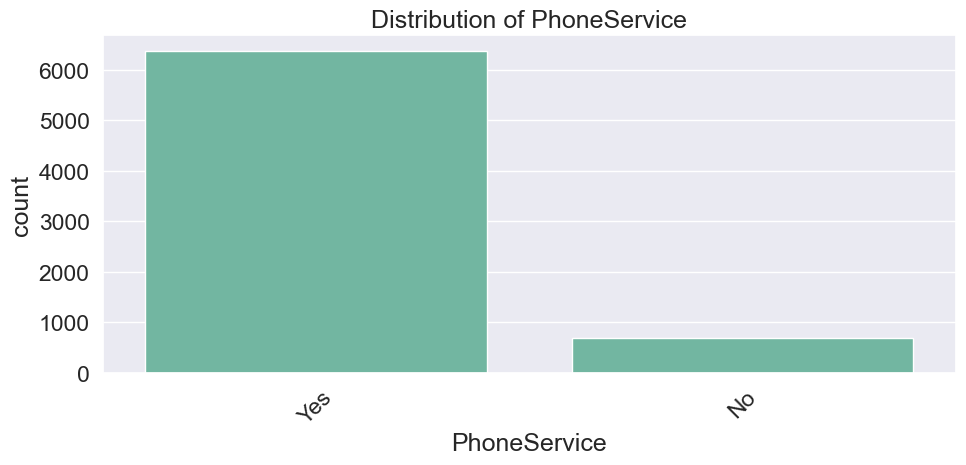

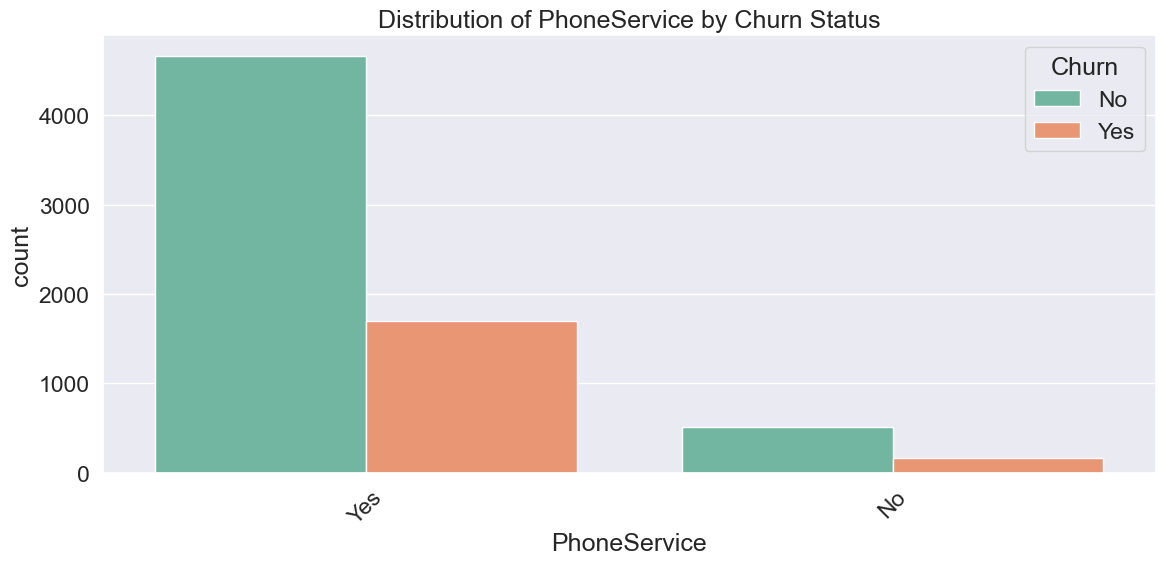

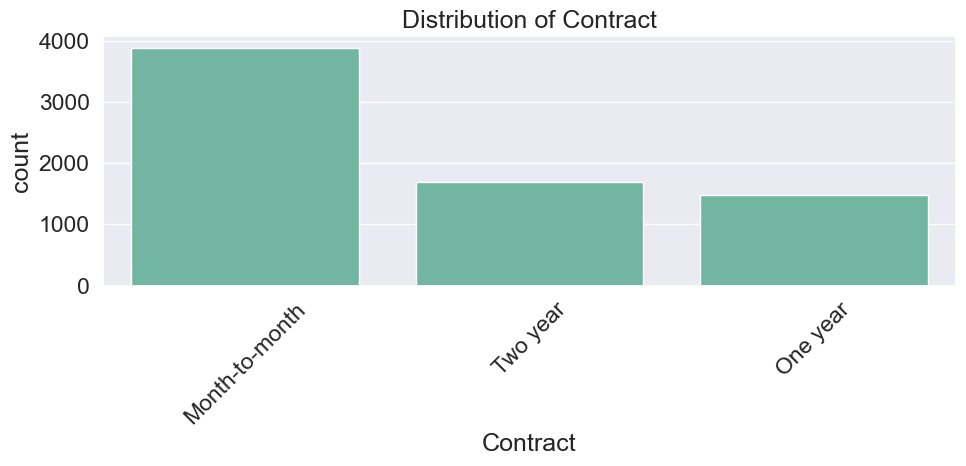

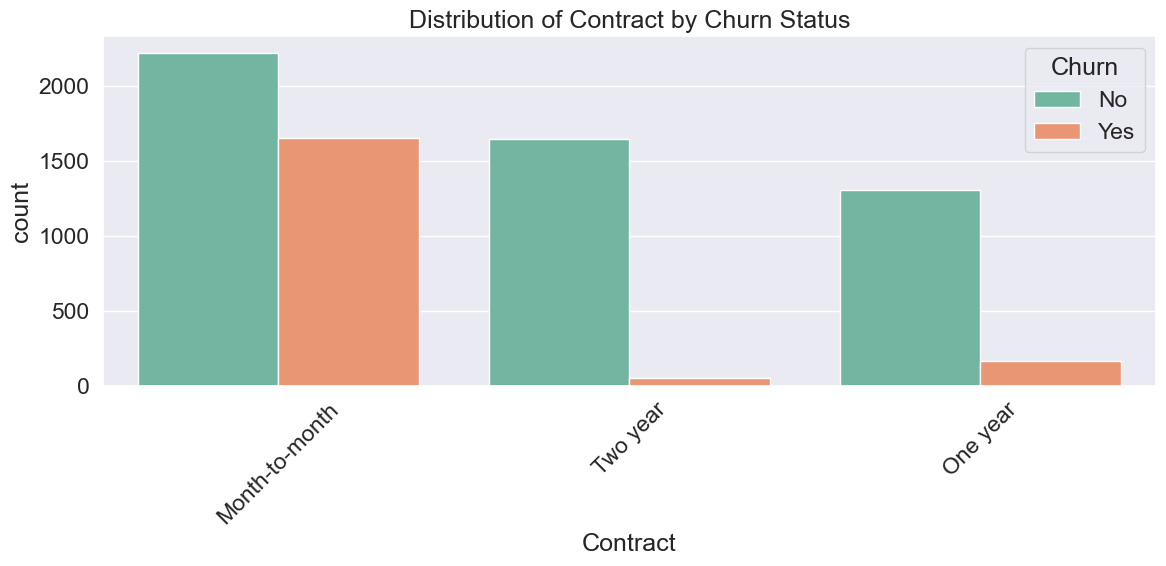

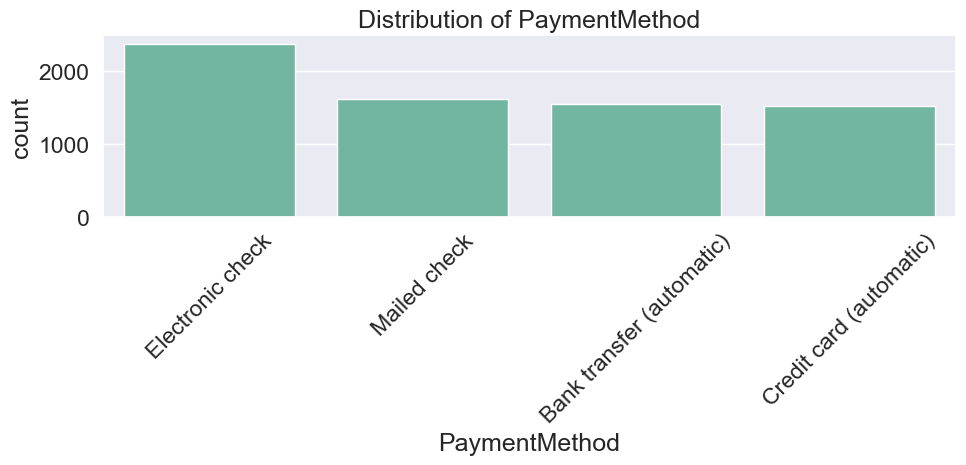

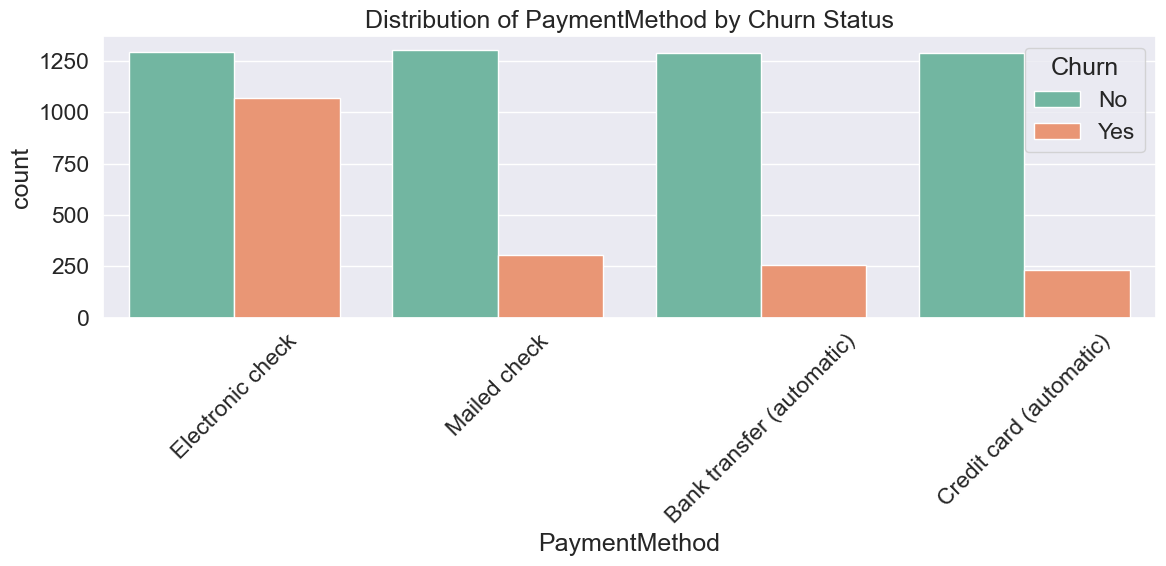

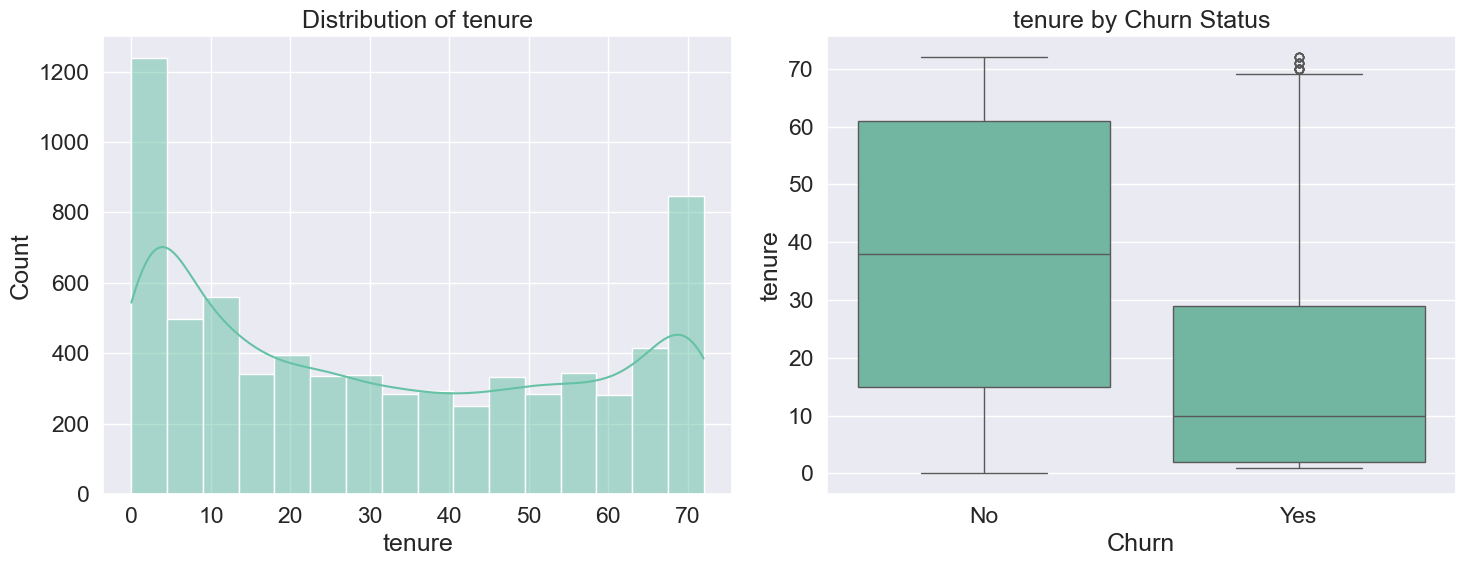

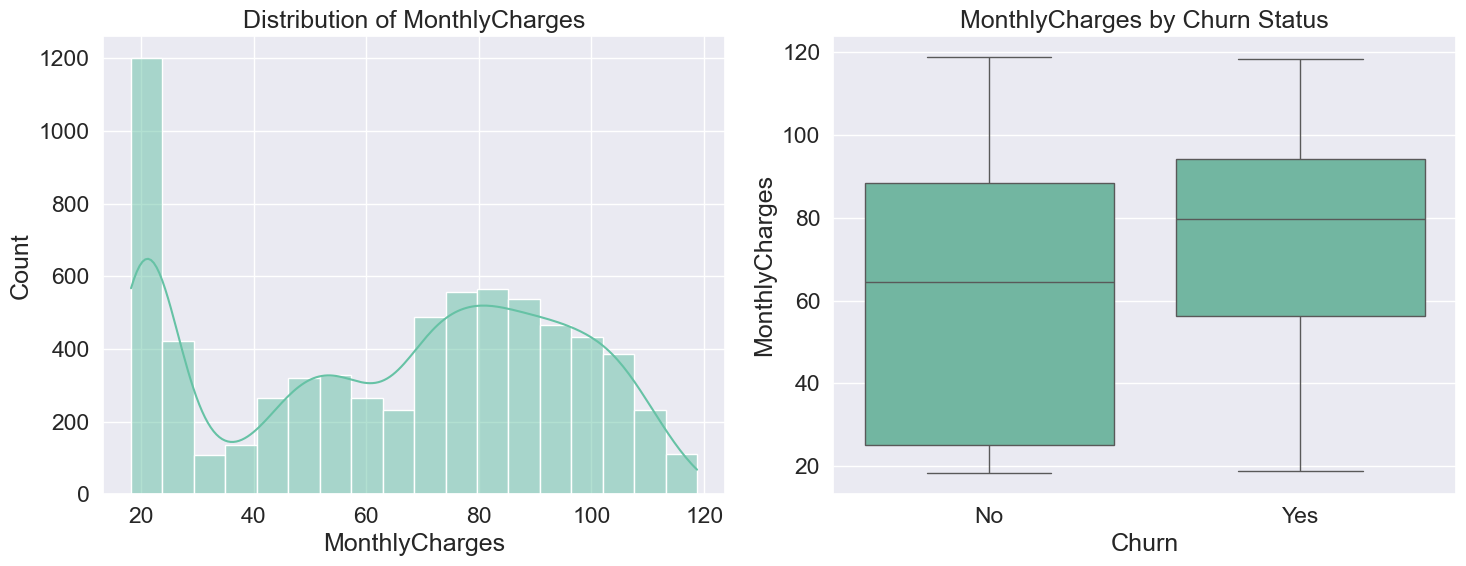

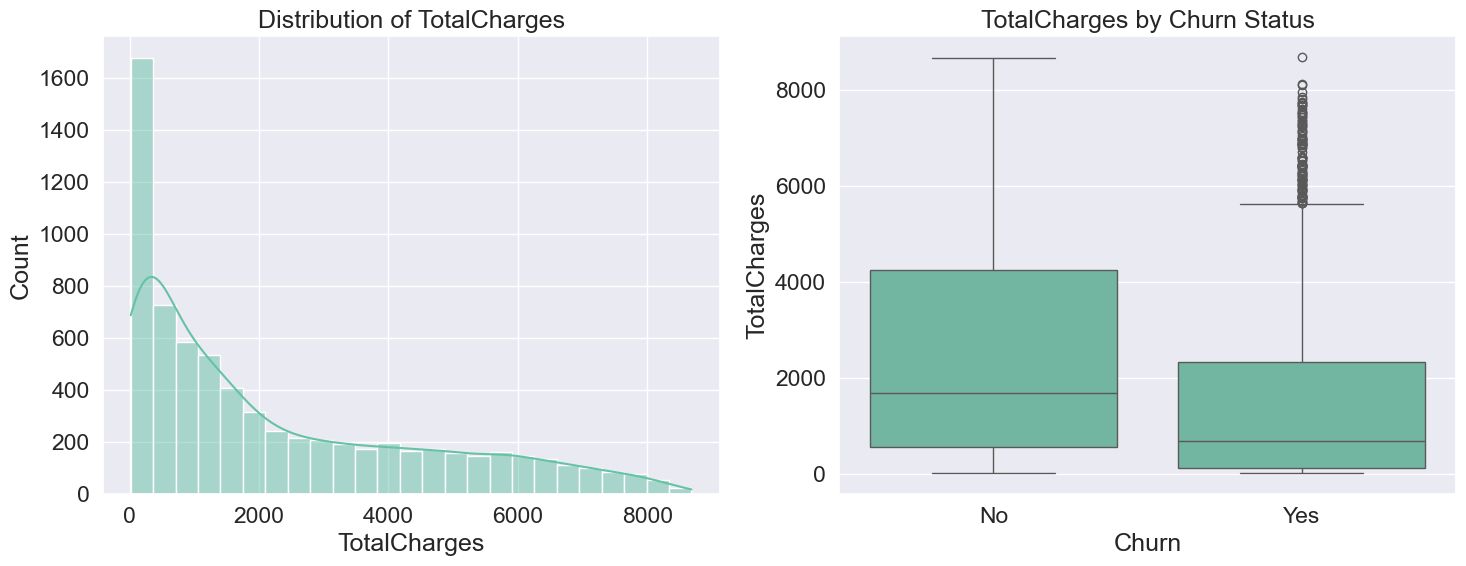

In [7]:
# Function for categorical univariate analysis
def plot_categorical(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {title}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Distribution by churn
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='Churn', data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {title} by Churn Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function for numerical univariate analysis
def plot_numerical(df, column, title):
    plt.figure(figsize=(15, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {title}')
    
    # Box plot by churn status
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'{title} by Churn Status')
    
    plt.tight_layout()
    plt.show()

# Analyze key categorical features
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'PaymentMethod']:
    if column in df.columns:
        plot_categorical(df, column, column)

# Analyze key numerical features
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if column in df.columns:
        # Convert TotalCharges to numeric if needed
        if column == 'TotalCharges' and df[column].dtype == 'object':
            df[column] = pd.to_numeric(df[column], errors='coerce')
        plot_numerical(df, column, column)


## Bivariate and Multivariate Distributions

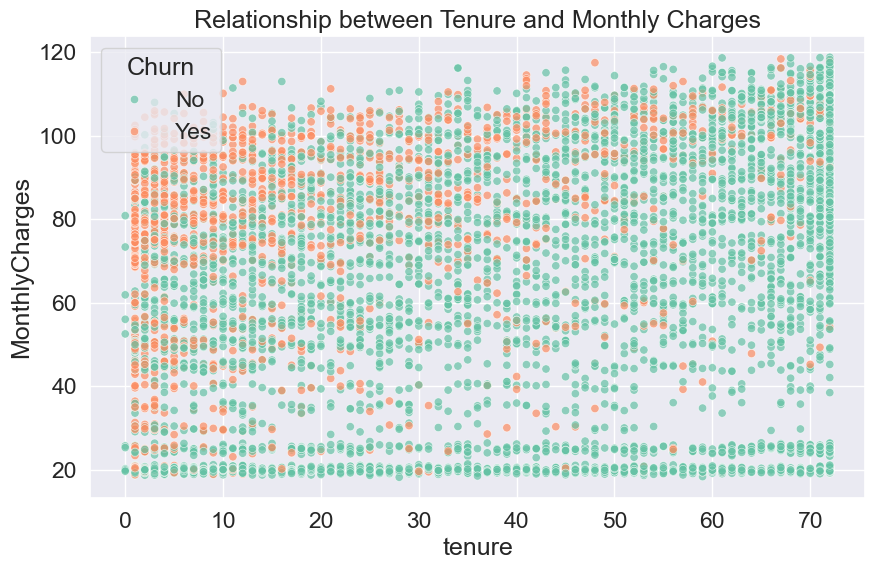

In [10]:
# Relationship between tenure and monthly charges, colored by churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7)
plt.title('Relationship between Tenure and Monthly Charges')
plt.show()


# 📊 Analysis of Scatter Plot:

## ➔ Early Tenure (0–10 months):
* Heavily populated with churners (lots of orange dots).
* Customers with low tenure are at higher risk of churning.
* Even across all charge levels (low or high bill), new customers leave faster.

## ➔ Mid Tenure (10–40 months):
* More stable.
* Still some churners, but ratio of green to orange improves — more customers stay.

## ➔ High Tenure (40+ months):
* Very few churners (almost fully green).
* Customers who've stayed long are loyal.
* Loyalty builds with time.

## ➔ Monthly Charges impact:
* Customers with higher MonthlyCharges (above $70–80) seem to churn slightly more even if they have been with the company longer.
* At every tenure level, customers with higher bills (upward in the graph) show slightly more churn than those with lower bills.

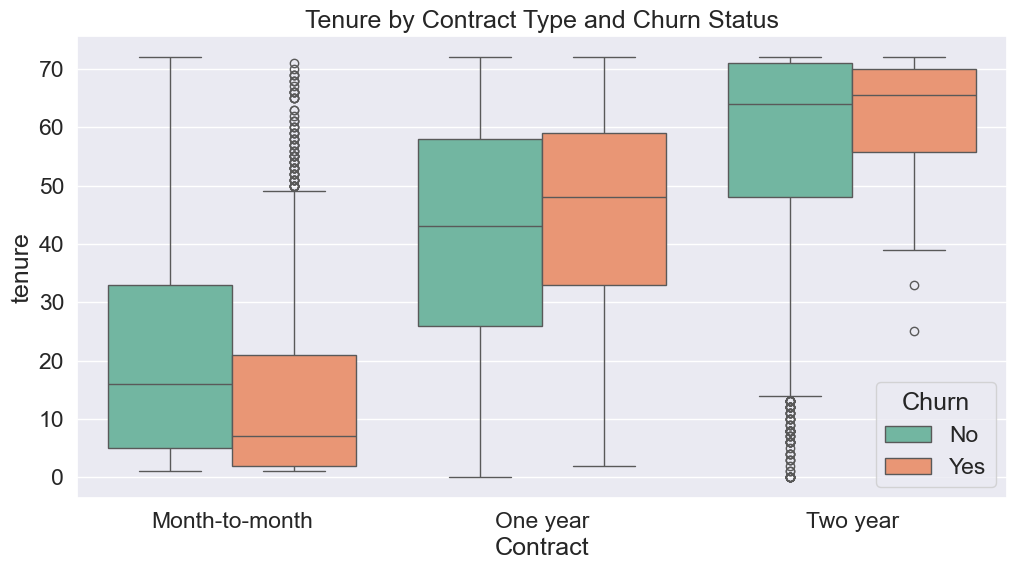

In [11]:
# Contract type vs tenure, colored by churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='tenure', hue='Churn', data=df)
plt.title('Tenure by Contract Type and Churn Status')
plt.show()

# 📦 Analysis of Box Plot: Tenure by Contract Type and Churn Status

---

## 🛠 Setup:

- **X-axis** → Contract Type: `Month-to-month`, `One year`, `Two year`
- **Y-axis** → Tenure (in months)
- **Hue (Color)** → Churn status (`Yes` = churned, `No` = stayed)

---

# 📚 Insights:

### ➔ 1. Month-to-month Contract:
- Customers have **low tenure** overall.
- **Churners (orange)** have **very low tenure** (mostly below 20 months).
- **High churn rate** visible for month-to-month customers.
- Many **outliers** (small dots) for long-staying month-to-month customers (but rare).

---

### ➔ 2. One Year Contract:
- Tenure is **higher** compared to month-to-month.
- Churners (orange) and non-churners (green) have **overlapping tenure**, but:
  - Churners still tend to have slightly **lower tenure**.
- **Less churn** than month-to-month customers.

---

### ➔ 3. Two Year Contract:
- Customers have the **highest tenure**.
- Churners (orange) and non-churners (green) are both **high tenure** (close to 70 months).
- Very **few churners** in two-year contracts.
- Outliers show that even two-year contract customers sometimes leave early, but rare.

---

# 🔥 Final Key Takeaways:

| Contract Type | Churn Tendency | Tenure Behavior |
|:--------------|:---------------|:----------------|
| Month-to-month | Highest churn | Short tenure |
| One year | Moderate churn | Medium tenure |
| Two year | Lowest churn | High tenure |

---

# 🧠 Business Insight:
> Longer contract types (1 or 2 years) are **effective at retaining customers**.  
> Month-to-month customers need **better loyalty programs or incentives** to reduce churn.


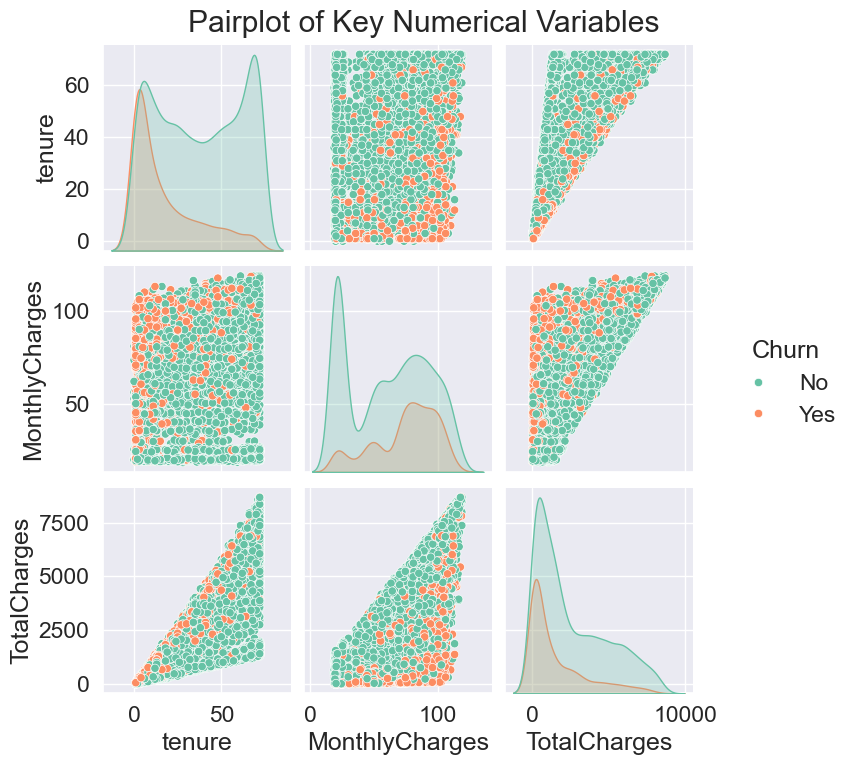

In [9]:

# Pairplot of key numerical variables
if all(col in df.columns for col in ['tenure', 'MonthlyCharges', 'TotalCharges']):
    # Ensure TotalCharges is numeric
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Create pairplot
    sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
                 hue='Churn', height=2.5)
    plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
    plt.show()

# Analysis from Pair Plot

## 1. diagonal plots(distributions)
* **Tenure**
    * Most customers have low tenure (left side of curve).
    * People who churn (orange) seem skewed heavily toward lower tenure.
    * Meaning: Newer customers are more likely to churn.
* **Monthly Charges**
    * Churners (orange) are slightly more common at higher monthly charges.
    * Meaning: Higher-paying customers might churn more.
* **Total Charges**
    * Churners have lower total charges overall (makes sense — if you churn early, you don't pay much).

## 2. off-diagonal plots(relationships)
* **Tenure vs. Monthly Charges**
    * Spread is wide.
    * No strong linear pattern.
    * Churners are a little concentrated in low-tenure but medium-to-high monthly charges.
    * Insight: New customers with higher monthly bills are more at risk.
    
* **Tenure vs. Total Charges**
    * Strong positive correlation (nice diagonal stripe).
    * Logically makes sense: the longer you stay (tenure), the more you pay (TotalCharges).
    * Insight: Tenure and TotalCharges are highly positively correlated.

* **Monthly Charges vs. Total Charges**
    * Also positively correlated but with more spread.
    * For same MonthlyCharges, customers have different TotalCharges (depends on how long they stayed).
    * Insight: MonthlyCharges alone doesn't explain TotalCharges; tenure matters too.

## 📚 tl;dr
New customers with high monthly bills are most likely to churn — and Tenure + TotalCharges are tightly linked.

# Module 3: Advanced Data Cleaning

* Handling missing values with advanced techniques
* Detecting and treating outliers
* Feature transformation and normalization



Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
C

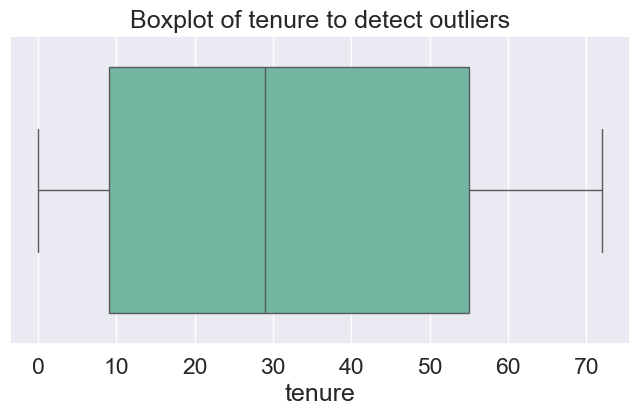

Number of outliers in tenure: 0


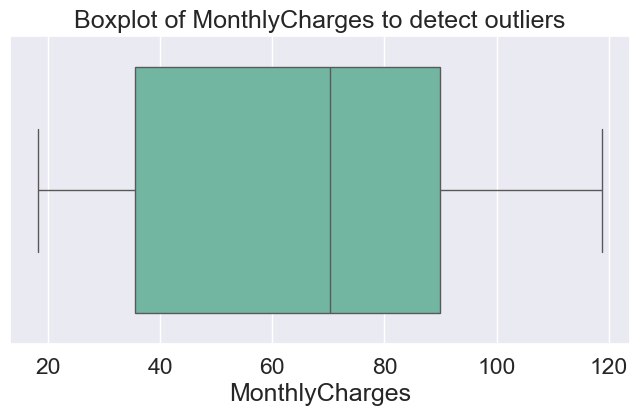

Number of outliers in MonthlyCharges: 0


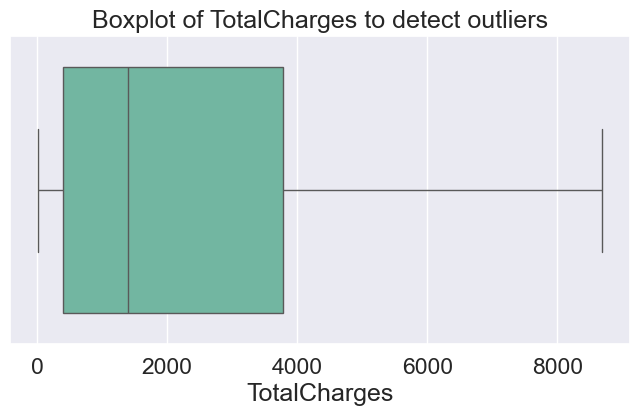

Number of outliers in TotalCharges: 0

Dataset shape after cleaning and encoding: (7043, 32)
First 5 rows after cleaning:
   customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  7590-VHVEG              0        1           0       1             0   
1  5575-GNVDE              0        0           0      34             1   
2  3668-QPYBK              0        0           0       2             1   
3  7795-CFOCW              0        0           0      45             0   
4  9237-HQITU              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No i

In [15]:
# Make a copy of the original data
df_clean = df.copy()

# Handle missing values
print(f"Missing values before cleaning:\n{df_clean.isnull().sum()}")

# Convert TotalCharges to numeric if it isn't already
if df_clean['TotalCharges'].dtype == 'object':
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with MonthlyCharges (for new customers)
if df_clean['TotalCharges'].isnull().sum() > 0:
    df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(df_clean['MonthlyCharges'])

print(f"Missing values after cleaning:\n{df_clean.isnull().sum()}")

# Check for and handle outliers
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    # Create boxplot to visualize outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col} to detect outliers')
    plt.show()
    
    # Calculate IQR and define outlier bounds
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")
    
    # For this tutorial, we'll note outliers but not remove them
    # as they may represent valid customer segments

# Feature encoding for categorical variables
for col in categorical_cols:
    if col != 'customerID':  # Skip ID column
        # Replace 'Yes'/'No' with 1/0
        if set(df_clean[col].unique()) == {'Yes', 'No'} or set(df_clean[col].unique()) == {'Yes', 'No', np.nan}:
            df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})
        else:
            # One-hot encoding for categorical variables with multiple categories
            df_clean = pd.get_dummies(df_clean, columns=[col], drop_first=True)

# Convert target variable to numeric if needed
if 'Churn' in df_clean.columns and df_clean['Churn'].dtype == 'object':
    df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

print(f"\nDataset shape after cleaning and encoding: {df_clean.shape}")
print(f"First 5 rows after cleaning:\n{df_clean.head()}")

# Module 4: Pattern Discovery

* Correlation analysis and causation pitfalls
* Time series pattern identification
* Dimensionality reduction techniques (PCA, t-SNE)



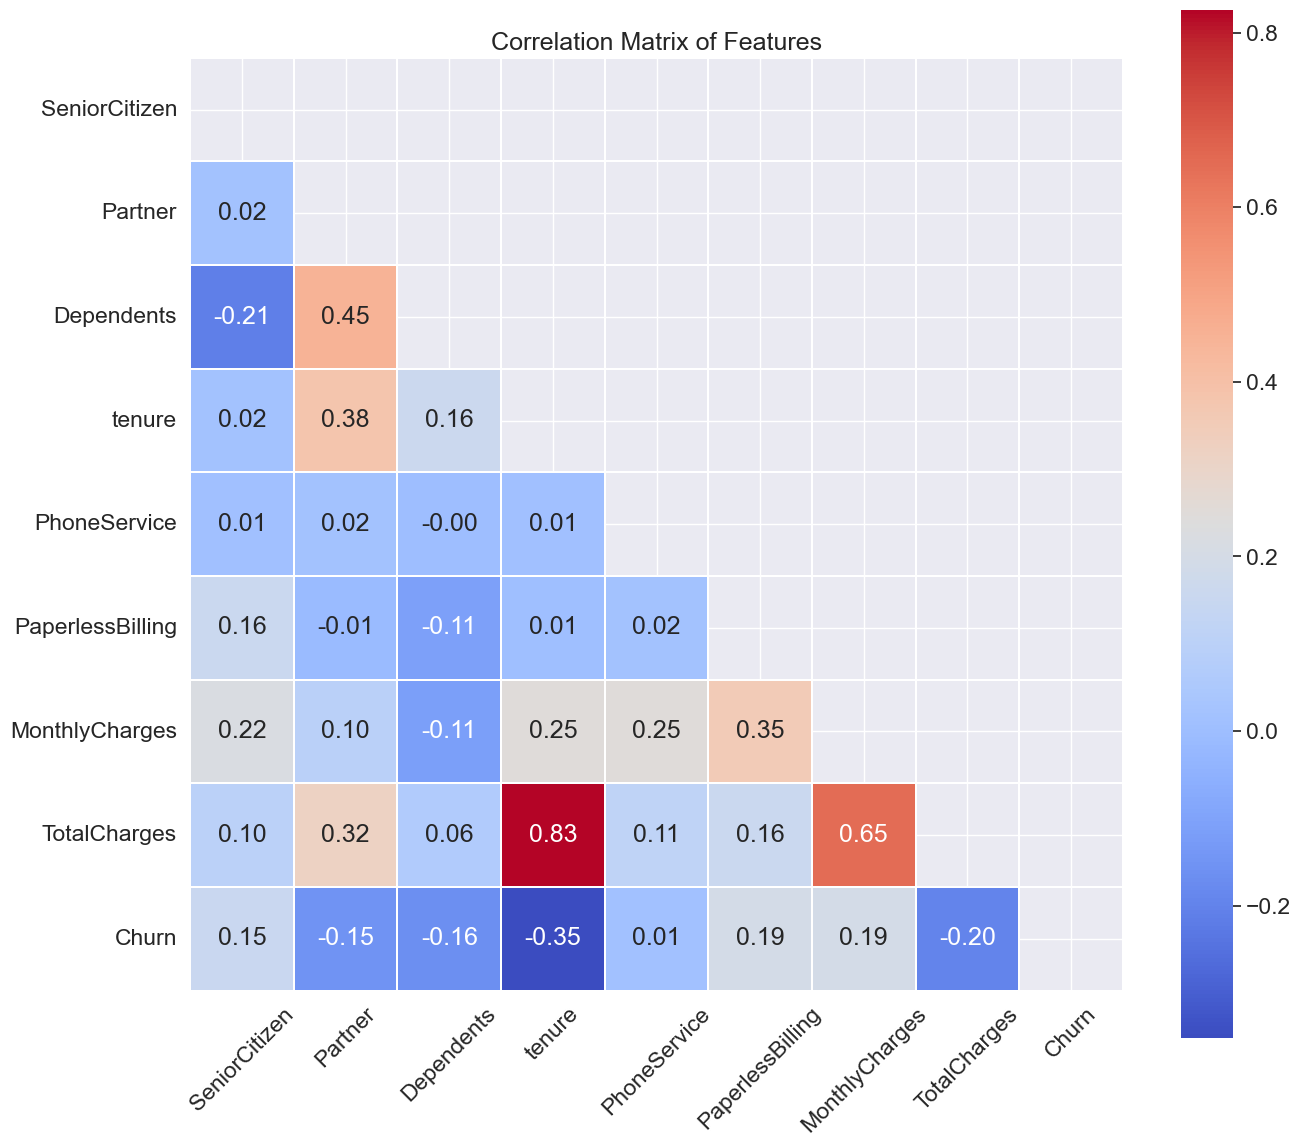

Features most correlated with churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198347
tenure             -0.352229
Name: Churn, dtype: float64


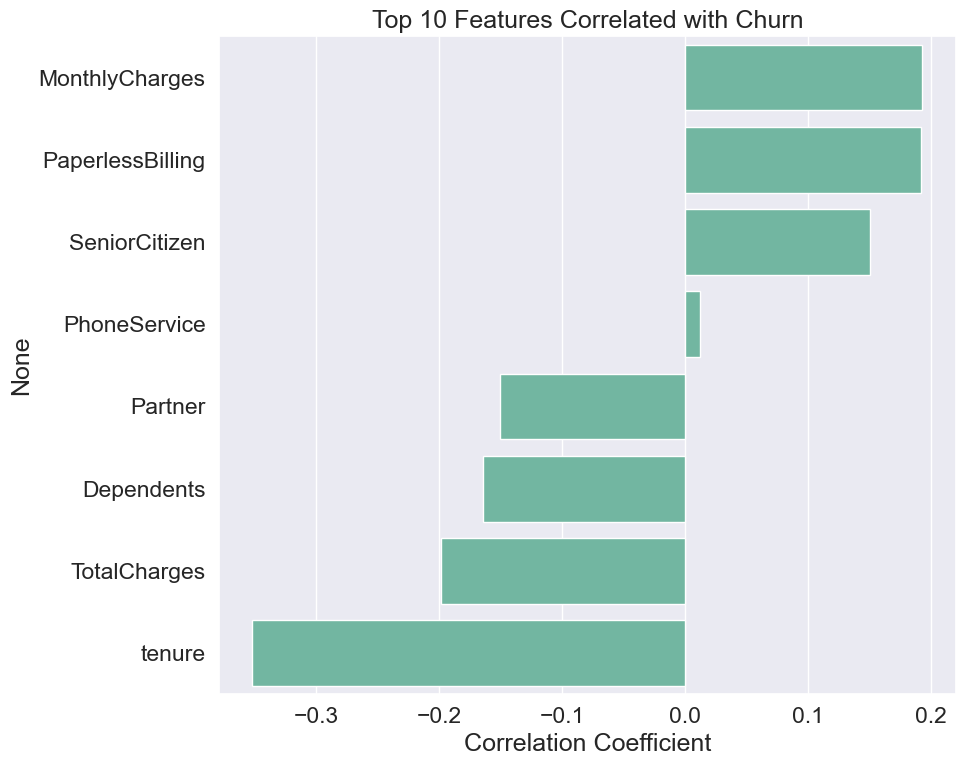

In [23]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 12))
correlation_matrix = df_clean.select_dtypes(include=['int64', 'float64']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.25, square=True)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Identify top correlated features with churn
if 'Churn' in correlation_matrix.columns:
    churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
    print("Features most correlated with churn:")
    print(churn_correlations)

    # Visualize top correlations with churn
    plt.figure(figsize=(10, 8))
    churn_correlations = churn_correlations[churn_correlations.index != 'Churn']
    top_correlations = churn_correlations.sort_values(ascending=False).head(10)
    
    sns.barplot(x=top_correlations.values, y=top_correlations.index)
    plt.title('Top 10 Features Correlated with Churn')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

# Correlation analysis
- **Long tenure** strongly reduces churn.
- **Higher TotalCharges** also slightly reduces churn.
- **Customers with dependents/partners** churn a bit less.
- **Paperless billing** and **being a senior citizen** might slightly increase churn.
- **Monthly charges** alone have **no direct strong relation** to churn.

## PCA

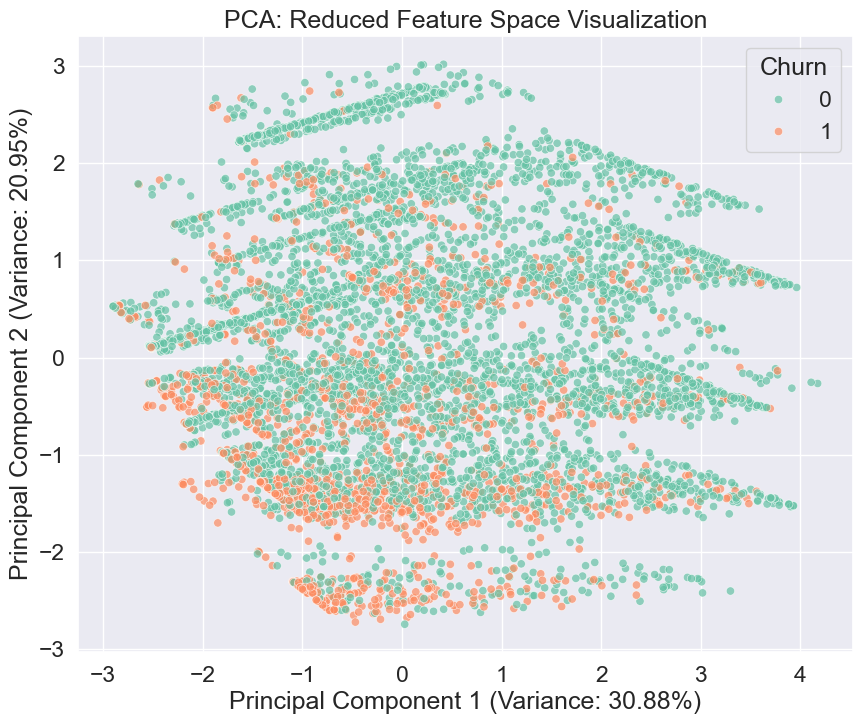

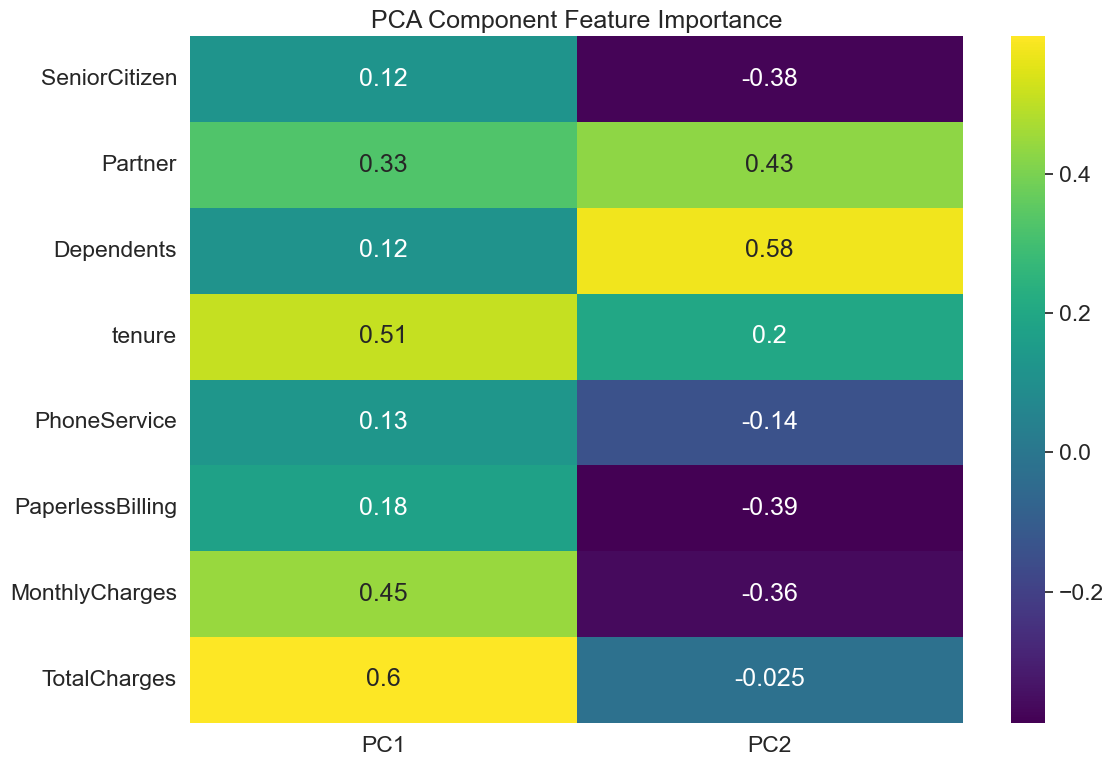

In [ ]:
# Dimensionality reduction with PCA for visualization
if df_clean.select_dtypes(include=['int64', 'float64']).shape[1] >= 3:
    # Select numerical features
    features_for_pca = df_clean.select_dtypes(include=['int64', 'float64']).columns
    
    '''
    Remove the columns Churn and customerID because:
        - Churn is the label, not a feature.
        - customerID is just an identifier (not useful for PCA).
    '''
    features_for_pca = [f for f in features_for_pca if f != 'Churn' and f != 'customerID']
    
    if len(features_for_pca) >= 3:  # Need at least 3 features for meaningful PCA
        # Standardize the data
        scaler = StandardScaler() # PCA works best when data is standardized (mean = 0, std = 1).
        scaled_data = scaler.fit_transform(df_clean[features_for_pca]) # visualize on a 2D plot
        
        # Apply PCA
        pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
        principal_components = pca.fit_transform(scaled_data)
        
        # Create a dataframe with the principal components
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Churn'] = df_clean['Churn']
        
        # Visualize the PCA results
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=pca_df, alpha=0.7)
        plt.title('PCA: Reduced Feature Space Visualization')
        plt.xlabel(f'Principal Component 1 (Variance: {pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'Principal Component 2 (Variance: {pca.explained_variance_ratio_[1]:.2%})')
        plt.show()
        
        # Show the most important features for each principal component
        feature_importance = pd.DataFrame(
            pca.components_.T,                          # pca.componens_ contains eigenvectors, '.T' transposes them to match the PCs
            columns=[f'PC{i+1}' for i in range(2)],
            index=features_for_pca
        )
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(feature_importance, annot=True, cmap='viridis')
        plt.title('PCA Component Feature Importance')
        plt.tight_layout()
        plt.show()

# Module 5: Storytelling with Data

* Creating narrative flow in analysis
* Designing clear visualization dashboards
* Communicating insights effectively to stakeholders


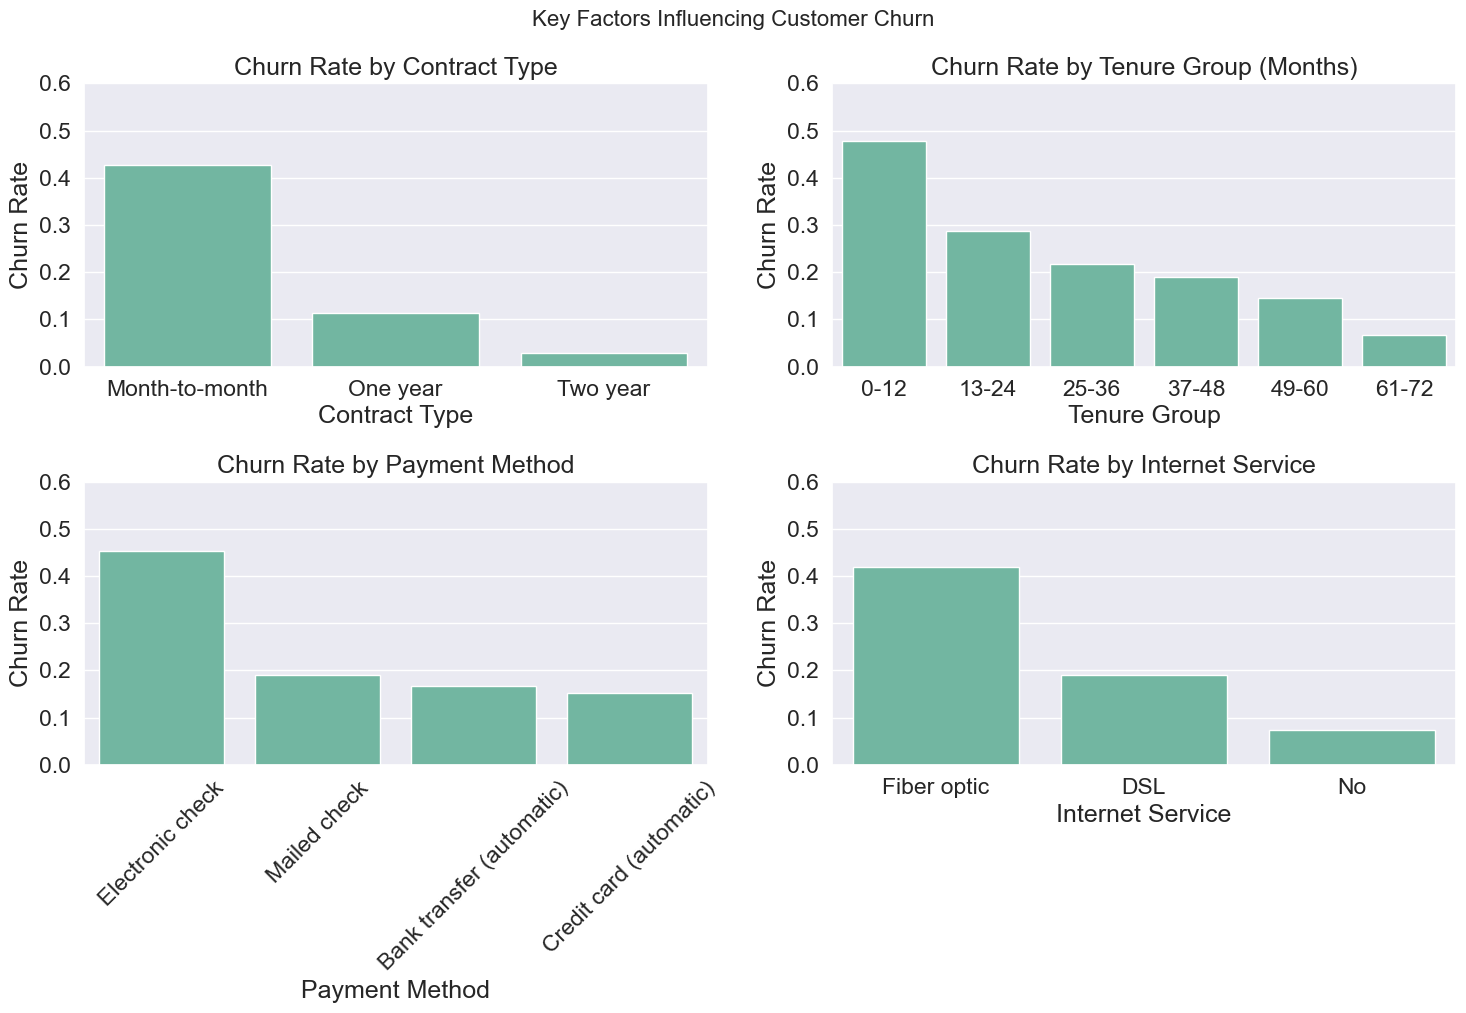

In [27]:
# Customer segments visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Churn rate by contract type
plt.subplot(2, 2, 1)
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.ylim(0, 0.6)

# Subplot 2: Churn rate by tenure group
plt.subplot(2, 2, 2)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
tenure_churn = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean())
sns.barplot(x=tenure_churn.index, y=tenure_churn.values)
plt.title('Churn Rate by Tenure Group (Months)')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Group')
plt.ylim(0, 0.6)

# Subplot 3: Churn rate by payment method
plt.subplot(2, 2, 3)
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
sns.barplot(x=payment_churn.index, y=payment_churn.values)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.ylim(0, 0.6)

# Subplot 4: Churn rate by internet service
plt.subplot(2, 2, 4)
if 'InternetService' in df.columns:
    internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
    sns.barplot(x=internet_churn.index, y=internet_churn.values)
    plt.title('Churn Rate by Internet Service')
    plt.ylabel('Churn Rate')
    plt.xlabel('Internet Service')
    plt.ylim(0, 0.6)

plt.tight_layout()
plt.suptitle('Key Factors Influencing Customer Churn', fontsize=16, y=1.02)
plt.show()


# Analysis of churn rates

## 1. Churn Rate by Contract Type
- **Month-to-month** customers have the highest churn (~42%).
- **One-year** and **Two-year** contracts have much lower churn rates.

**Insight:** Longer contracts improve customer retention.

---

## 2. Churn Rate by Tenure Group
- Churn is highest for customers with **0–12 months** tenure (~48%).
- Churn decreases significantly as tenure increases.

**Insight:** Newer customers are more likely to churn.

---

## 3. Churn Rate by Payment Method
- **Electronic check** users show the highest churn (~45%).
- Customers using **automatic payments** (bank/credit card) have lower churn.

**Insight:** Auto-pay methods correlate with better retention.

---

## 4. Churn Rate by Internet Service
- **Fiber optic** users churn the most (~42%).
- Customers with **DSL** or **No internet service** churn less.

**Insight:** Fiber users might face service issues leading to churn.

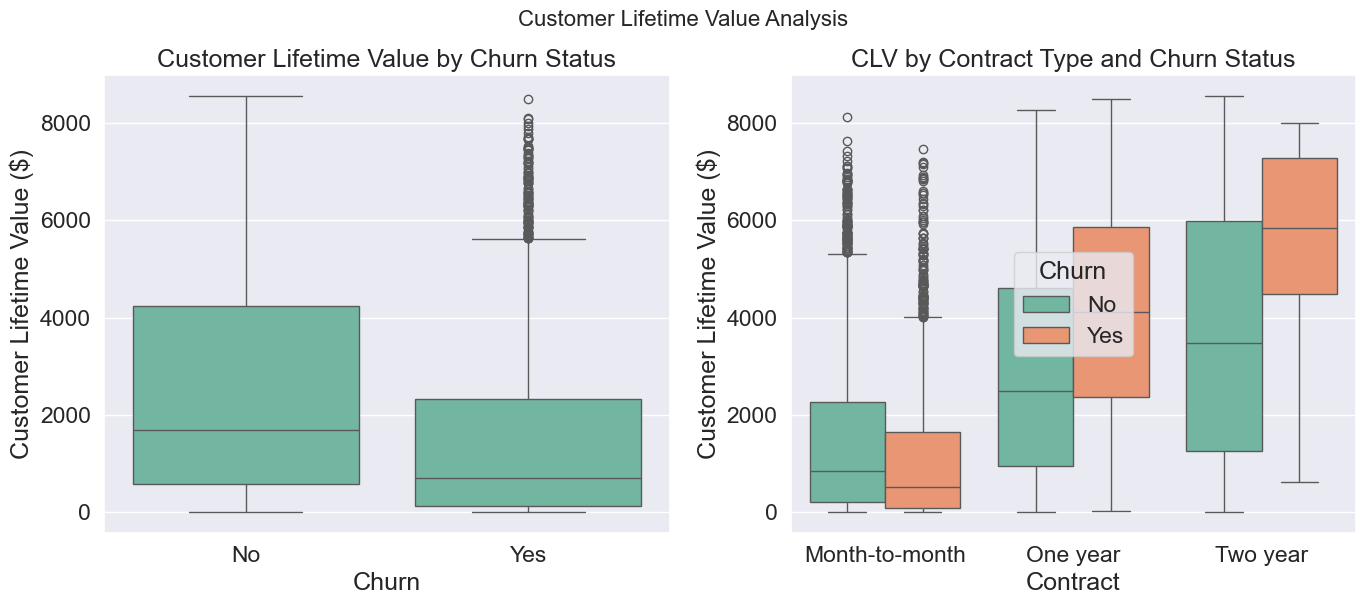

In [28]:

# Customer lifetime value analysis
plt.figure(figsize=(14, 6))

# Convert tenure to numeric if it's not
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Calculate customer lifetime value (simplified as tenure * monthly charges)
df['CLV'] = df['tenure'] * df['MonthlyCharges']

# Subplot 1: Distribution of CLV by churn status
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='CLV', data=df)
plt.title('Customer Lifetime Value by Churn Status')
plt.ylabel('Customer Lifetime Value ($)')

# Subplot 2: CLV by contract and churn status
plt.subplot(1, 2, 2)
sns.boxplot(x='Contract', y='CLV', hue='Churn', data=df)
plt.title('CLV by Contract Type and Churn Status')
plt.ylabel('Customer Lifetime Value ($)')
plt.legend(title='Churn')

plt.tight_layout()
plt.suptitle('Customer Lifetime Value Analysis', fontsize=16, y=1.02)
plt.show()


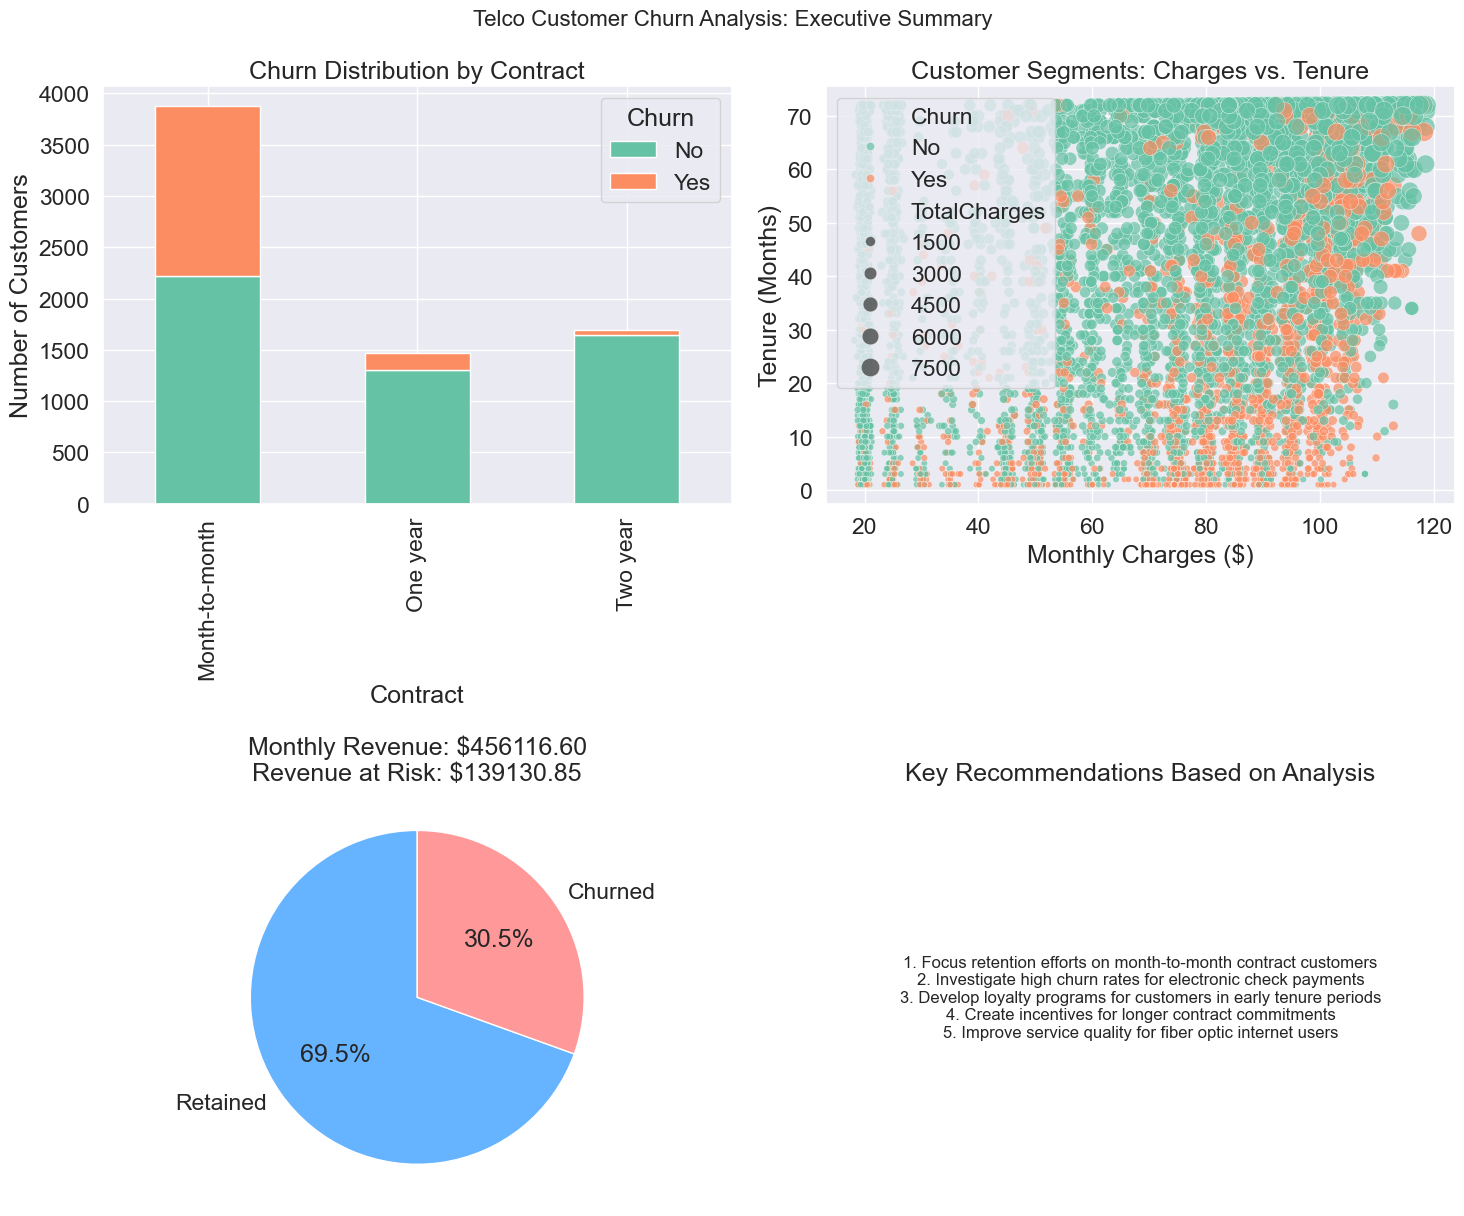

In [29]:

# Create a story-focused summary dashboard
plt.figure(figsize=(15, 12))

# Key insights plots
plt.subplot(2, 2, 1)
top_features = ['Contract', 'tenure_group', 'PaymentMethod']
counts = []
for feature in top_features:
    if feature in df.columns:
        counts.append(df.groupby([feature, 'Churn']).size().unstack())

if counts:
    churn_counts = counts[0]  # Use the first feature for demonstration
    churn_counts.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Churn Distribution by {top_features[0]}')
    plt.xlabel(top_features[0])
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn')

# Customer segments
plt.subplot(2, 2, 2)
if 'MonthlyCharges' in df.columns and 'tenure' in df.columns:
    sns.scatterplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn', 
                    size='TotalCharges', sizes=(20, 200), alpha=0.7)
    plt.title('Customer Segments: Charges vs. Tenure')
    plt.xlabel('Monthly Charges ($)')
    plt.ylabel('Tenure (Months)')

# Business impact visualization
plt.subplot(2, 2, 3)
if 'MonthlyCharges' in df.columns and 'Churn' in df.columns:
    churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
    retained = df[df['Churn'] == 'No']['MonthlyCharges'].sum()
    plt.pie([retained, churned], labels=['Retained', 'Churned'], autopct='%1.1f%%',
            colors=['#66b3ff', '#ff9999'], startangle=90)
    plt.title(f'Monthly Revenue: ${retained + churned:.2f}\nRevenue at Risk: ${churned:.2f}')

# Recommendations summary
plt.subplot(2, 2, 4)
plt.axis('off')
recommendations = [
    "1. Focus retention efforts on month-to-month contract customers",
    "2. Investigate high churn rates for electronic check payments",
    "3. Develop loyalty programs for customers in early tenure periods",
    "4. Create incentives for longer contract commitments",
    "5. Improve service quality for fiber optic internet users"
]
plt.text(0.5, 0.5, '\n'.join(recommendations), ha='center', va='center', 
         fontsize=12, wrap=True)
plt.title('Key Recommendations Based on Analysis')

plt.tight_layout()
plt.suptitle('Telco Customer Churn Analysis: Executive Summary', fontsize=16, y=1.02)
plt.show()


# Module 6: Preparing Data for Modeling

In [33]:
# Prepare data for modeling
def prepare_for_modeling(df, target_column):
    """
    Prepare the cleaned dataframe for modeling
    
    Parameters:
    df (pd.DataFrame): Cleaned dataframe
    target_column (str): Name of the target variable column
    
    Returns:
    tuple: X_train, X_test, y_train, y_test
    """
    print("\n\nPREPARING DATA FOR MODELING")
    print("-"*50)
    
    # Create a copy to avoid modifying the original
    model_df = df.copy()
    
    # Drop non-feature columns
    if 'customerID' in model_df.columns:
        model_df = model_df.drop('customerID', axis=1)
    
    # Ensure all columns are numeric
    categorical_cols = model_df.select_dtypes(include=['object']).columns.tolist()
    
    for col in categorical_cols:
        if col != target_column:
            # For binary categorical variables
            if len(model_df[col].unique()) <= 2:
                # Map first value to 0, second to 1
                unique_vals = list(model_df[col].unique())
                model_df[col] = model_df[col].map({unique_vals[0]: 0, 
                                                unique_vals[-1]: 1})
            else:
                # One-hot encode other categorical variables
                model_df = pd.get_dummies(model_df, columns=[col], drop_first=True)
    
    # Encode target if categorical
    if target_column in categorical_cols:
        unique_targets = list(model_df[target_column].unique())
        model_df[target_column] = model_df[target_column].map({unique_targets[0]: 0, 
                                                         unique_targets[-1]: 1})
    
    # Split features and target
    X = model_df.drop(target_column, axis=1)
    y = model_df[target_column]
    
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    
    return X_train, X_test, y_train, y_test

# Prepare the data for modeling
X_train, X_test, y_train, y_test = prepare_for_modeling(df_clean, 'Churn')



PREPARING DATA FOR MODELING
--------------------------------------------------
Feature matrix shape: (7043, 30)
Target vector shape: (7043,)
Training set: 5634 samples
Testing set: 1409 samples
